In [2]:
# We'll need numpy for some mathematical operations
import numpy as np


# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [12]:
# audio_path = librosa.util.example_audio_file()

# or uncomment the line below and point it at your favorite song:
#
# audio_path = '/path/to/your/favorite/song.mp3'
audio_path = '../res/flute/flute_A4_025_forte_normal.mp3'
# audio_path = '../res/violin/violin_A4_025_forte_arco-normal.mp3'

y, sr = librosa.load(audio_path)

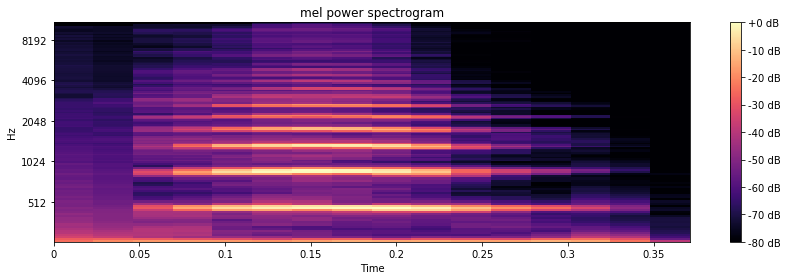

In [13]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

/Users/bgu/anaconda/envs/sound/lib/python3.6/site-packages/librosa/filters.py:261: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


1024


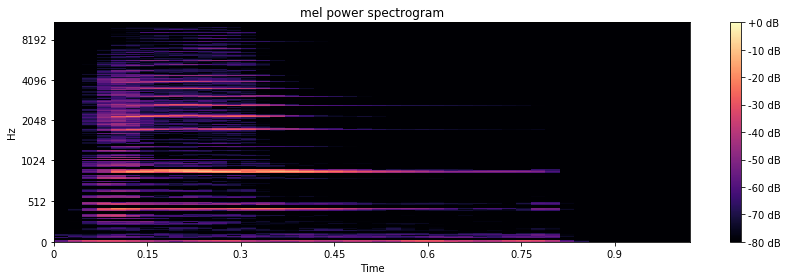

In [79]:
# audio_path = librosa.util.example_audio_file()

# or uncomment the line below and point it at your favorite song:
#
# audio_path = '/path/to/your/favorite/song.mp3'
# audio_path = '../res/flute/flute_A4_025_forte_normal.mp3'
audio_path = '../res/violin/violin_A4_025_forte_arco-normal.mp3'

y, sr = librosa.load(audio_path)

n_mels=1024

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=n_mels)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

print(len(np.sum(S, axis=1)))

In [80]:
log_S

array([[-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-53.94002398, -43.10123561, -34.91366082, ..., -80.        ,
        -80.        , -80.        ],
       ..., 
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]])

In [93]:
sum_log_S = np.sum(log_S, axis=1) 
print(sum_log_S)

[-3520.         -3520.         -2039.00338926 ..., -3520.         -3520.
 -3520.        ]


In [94]:
max_ind = np.argmax(sum_log_S)
print(max_ind)

135


In [95]:
timesteps = len(log_S[0])
pad_sum_log_S = np.pad(sum_log_S, (n_mels-1 - max_ind, max_ind), 'constant', constant_values=(-80 * timesteps,-80 * timesteps))
print(pad_sum_log_S)

[-3520. -3520. -3520. ..., -3520. -3520. -3520.]


In [99]:
pad_sum_log_S_norm = pad_sum_log_S + 80 * timesteps
pad_sum_log_S_norm = pad_sum_log_S_norm / pad_sum_log_S_norm[n_mels - 1]
pad_sum_log_S_norm = pad_sum_log_S_norm[n_mels - 1:]

[  8.75574860e-02   0.00000000e+00   7.74910811e-02   1.29731823e-01
   0.00000000e+00   0.00000000e+00   2.09545029e-01   9.46786136e-02
   0.00000000e+00   1.42597597e-01   1.28183023e-01   0.00000000e+00
   9.41000334e-02   1.26048201e-01   0.00000000e+00   0.00000000e+00
   1.28665374e-01   5.23556376e-02   0.00000000e+00   1.20546545e-01
   1.05637960e-01   0.00000000e+00   1.38218142e-01   1.77506854e-01
   0.00000000e+00   0.00000000e+00   2.82757710e-01   9.38884220e-02
   0.00000000e+00   3.97753173e-01   3.55851855e-01   0.00000000e+00
   6.34064488e-01   6.76442625e-01   0.00000000e+00   5.44922208e-01
   7.75191605e-01   0.00000000e+00   0.00000000e+00   6.93719662e-01
   6.29794618e-01   0.00000000e+00   4.18026279e-01   4.42375825e-01
   0.00000000e+00   2.08319997e-01   3.21535797e-01   0.00000000e+00
   0.00000000e+00   2.22469746e-01   1.68819932e-01   0.00000000e+00
   1.50183890e-01   1.58449377e-01   0.00000000e+00   8.51921694e-02
   1.45069804e-01   0.00000000e+00

In [85]:
def get_feature_vector(audio_path, n_mels):
    y, sr = librosa.load(audio_path)
    
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=n_mels)
    timesteps = len(log_S[0])

    # Convert to log scale (dB). We'll use the peak power as reference.
    log_S = librosa.logamplitude(S, ref_power=np.max)
    sum_log_S = np.sum(log_S, axis=1) 
    max_ind = np.argmax(sum_log_S)
    pad_sum_log_S = np.pad(sum_log_S, (n_mels - 1 - max_ind, max_ind), 'constant', constant_values=(-80 * timesteps, -80 * timesteps))
    pad_sum_log_S_norm = pad_sum_log_S + 80 * timesteps
    pad_sum_log_S_norm = pad_sum_log_S_norm / pad_sum_log_S_norm[n_mels - 1]
    pad_sum_log_S_norm = pad_sum_log_S_norm[n_mels - 1:]
    
    return pad_sum_log_S_norm